In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('usage_data.csv')


In [3]:
df.head()

,x,y,z,status
0,-0.123084,-0.909835,-0.399468,idle
1,-0.120303,-0.903106,-0.381034,idle
2,-0.123200,-0.893145,-0.454663,idle
3,-0.136790,-0.916880,-0.454484,idle
4,-0.129392,-0.911907,-0.371385,idle


In [4]:
df = df[~df['status'].isin(['false_motion', 'idle'])]
df.reset_index(drop=True, inplace=True)



In [5]:
from datetime import datetime, timedelta

total_rows = df.shape[0]

# Define percentage distribution for each day
distribution = [0.30, 0.10, 0.20, 0.05, 0.05, 0.15, 0.15]

# Calculate rows for each day
rows_per_day = [int(total_rows * percent) for percent in distribution]

while sum(rows_per_day) < total_rows:
    rows_per_day[0] += 1 


In [6]:
# Generate timestamps for each day
now = datetime.now()
timestamps = []
row_counter = 0

for i, rows in enumerate(rows_per_day):
    start_time = now - timedelta(days=i)
    for j in range(rows):
        timestamps.append(start_time - timedelta(seconds=j))
        row_counter += 1

# Assign to DataFrame
df['timestamp'] = timestamps[:total_rows]

In [7]:
df.head()

,x,y,z,status,timestamp
0,0.848198,0.253125,0.547243,used,2024-12-26 12:50:32.438347
1,0.826302,0.150570,0.420971,used,2024-12-26 12:50:31.438347
2,0.816081,0.368309,0.397311,used,2024-12-26 12:50:30.438347
3,0.717245,0.260025,0.166915,used,2024-12-26 12:50:29.438347
4,0.911807,0.347849,0.486642,used,2024-12-26 12:50:28.438347


In [8]:
df = df.sort_values(by='timestamp')
df.reset_index(drop=True, inplace=True)


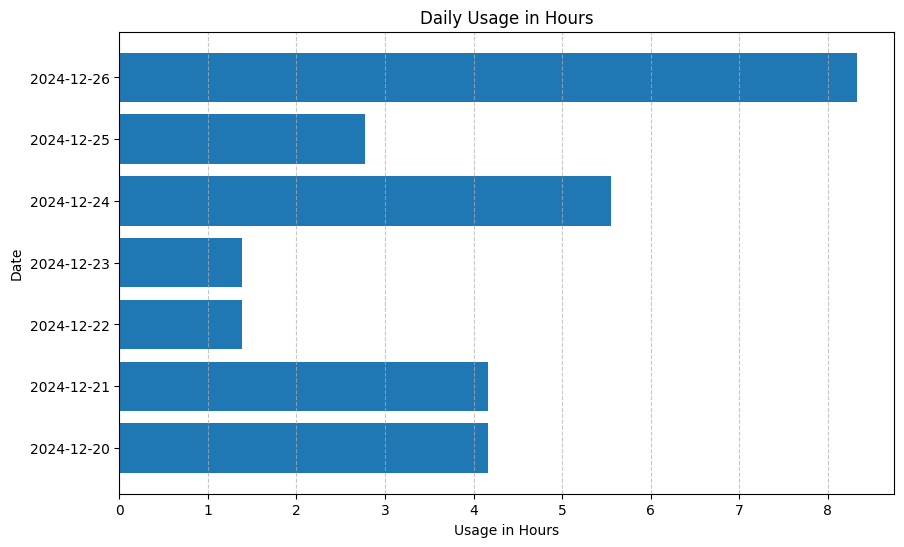

In [9]:
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date from the timestamp
df['date'] = df['timestamp'].dt.date

# Calculate total usage in hours per day
usage_hours = df.groupby('date').size().reset_index(name='usage_seconds')
usage_hours['usage_hours'] = usage_hours['usage_seconds'] / 3600

plt.figure(figsize=(10, 6))
plt.barh(usage_hours['date'].astype(str), usage_hours['usage_hours'])
plt.xlabel('Usage in Hours')
plt.ylabel('Date')
plt.title('Daily Usage in Hours')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [10]:
file_path = 'usage_data.csv'
df.to_csv(file_path, index=False)

**Save data into JSON format**

In [5]:
import json

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date from the timestamp
df['date'] = df['timestamp'].dt.date

# Calculate total usage per day (1 row = 1 second)
usage_per_day = df.groupby('date').size().reset_index(name='usage_seconds')

# Convert to list of dictionaries for JSON
usage_list = usage_per_day.to_dict(orient='records')

json_data = [{"date": str(entry['date']), "usage_hours": round(entry['usage_seconds'] / 3600, 2)} for entry in usage_list]
with open("monitor_usage.json", "w") as json_file:
    json.dump(json_data, json_file, indent=4)

print("Data saved to monitor_usage.json")

Data saved to monitor_usage.json
